In [37]:
from __future__ import division
import hoomd
import hoomd.md

In [38]:
hoomd.context.initialize("")

In [39]:
uc = hoomd.lattice.unitcell(N = 1,
                            a1 = [10.8, 0,   0],
                            a2 = [0,    1.2, 0],
                            a3 = [0,    0,   1.2],
                            dimensions = 3,
                            position = [[0,0,0]],
                            type_name = ['R'],
                            mass = [1.0],
                            moment_inertia = [[0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]],
                            orientation = [[1, 0, 0, 0]]);
system = hoomd.init.create_lattice(unitcell=uc, n=[2,18,18]);

notice(2): Group "all" created containing 648 particles


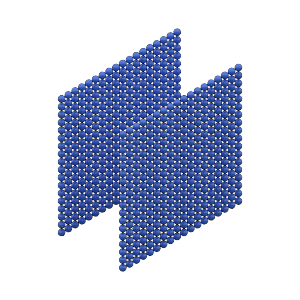

In [40]:
import ex_render
ex_render.render_sphere_frame(system.take_snapshot())

In [41]:
system.particles.types.add('A')

1

In [42]:
rigid=hoomd.md.constrain.rigid()
rigid.set_param('R',
                 types=['A']*8,
                 positions=[(-4,0,0),(-3,0,0),(-2,0,0),(-1,0,0),
                           (1,0,0),(2,0,0),(3,0,0),(4,0,0)])

In [43]:
rigid.create_bodies()

notice(2): constrain.rigid(): Creating 648 rigid bodies (adding 5184 particles)


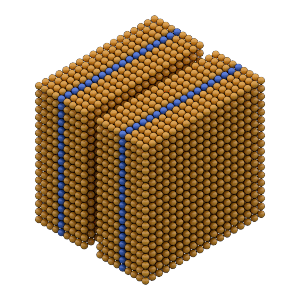

In [44]:
import ex_render
ex_render.render_sphere_frame(system.take_snapshot())

In [45]:
nl = hoomd.md.nlist.cell()

In [46]:
lj = hoomd.md.pair.lj(r_cut=2**(1/6), nlist=nl)
lj.set_params(mode='shift')

In [47]:
lj.pair_coeff.set(['R', 'A'], ['R', 'A'], epsilon=1.0, sigma=1.0)

In [48]:
hoomd.md.integrate.mode_standard(dt=0.005)

In [49]:
rigid=hoomd.group.rigid_center()
hoomd.md.integrate.langevin(group=rigid, kT=1.0, seed=42)

notice(2): Group "rigid_center" created containing 648 particles
notice(2): integrate.langevin/bd is using specified gamma values


In [50]:
hoomd.analyze.log(filename="log-output.log",
                  quantities=['potential_energy',
                              'translational_kinetic_energy',
                              'rotational_kinetic_energy'],
                  period=100,
                  overwrite=True)

In [51]:
hoomd.dump.gsd("trajectory.gsd",
               period=2e3,
               group=hoomd.group.all(),
               overwrite=True)

In [52]:
hoomd.run(1e4)

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 5832
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: yes
** starting run **
Time 00:03:51 | Step 1013 / 10000 | TPS 101.161 | ETA 00:01:28
Time 00:04:01 | Step 2054 / 10000 | TPS 104.06 | ETA 00:01:16
Time 00:04:11 | Step 3067 / 10000 | TPS 101.268 | ETA 00:01:08
Time 00:04:21 | Step 4098 / 10000 | TPS 103.049 | ETA 00:00:57
Time 00:04:31 | Step 5151 / 10000 | TPS 105.251 | ETA 00:00:46
Time 00:04:41 | Step 6201 / 10000 | TPS 104.927 | ETA 00:00:36
Time 00:04:51 | Step 7227 / 10000 | TPS 102.478 | ETA 00:00:27
Time 00:05:01 | Step 8186 / 10000 | TPS 95.8603 | ETA 00:00:18
Time 00:05:11 | Step 9071 / 10000 | TPS 88.4871 | ETA 00:00:10
Time 00:05:21 | Step 10000 / 10000 | TPS 98.7052 | ETA 00:00:00
Average TPS: 100.53
---------
-- Neighborlist stats:
1680 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min